# Import Libraries

In [1]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates


plt.rcParams['figure.figsize']=(12,3)
plt.style.use(['ggplot'])

# Load Data

In [2]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv'
df = pd.read_csv(url)
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


# Part 1) Load the data and make a datetime index

In [4]:
# Converting the date column to datetime dtype
## displaying random sample
df['date'].sample(n=10).sort_index()

6600     19970126
6627     19970222
6935     19971227
10996    20090208
11233    20091003
11543    20100809
12004    20111113
14059    20170629
14564    20181116
15213    20200826
Name: date, dtype: int64

In [5]:
df['date']= pd.to_datetime(df['date'], format = '%Y%m%d')

#set index 
df =df.set_index('date')
df.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15341 entries, 1979-01-01 to 2020-12-31
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cloud_cover       14938 non-null  float64
 1   sunshine          14957 non-null  float64
 2   global_radiation  14939 non-null  float64
 3   max_temp          14951 non-null  float64
 4   mean_temp         14922 non-null  float64
 5   min_temp          14955 non-null  float64
 6   precipitation     14951 non-null  float64
 7   pressure          14953 non-null  float64
 8   snow_depth        13589 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [7]:
#Keep only data from the year 2000 or later
df = df.loc['2000':, ['precipitation','mean_temp','min_temp', 'max_temp', 'snow_depth']]
df

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0
...,...,...,...,...,...
2020-12-27,2.0,7.5,7.6,7.5,NaN
2020-12-28,0.2,1.1,-1.3,3.6,NaN
2020-12-29,0.0,2.6,1.1,4.1,NaN


In [8]:
#missing data
df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [9]:
df.describe()

,precipitation,mean_temp,min_temp,max_temp,snow_depth
count,7281.000000,7252.000000,7285.000000,7281.000000,5919.000000
mean,1.723376,11.907308,8.000480,15.810850,0.023146
std,3.675610,5.669191,5.242933,6.526161,0.306467
min,0.000000,-4.100000,-9.400000,-1.200000,0.000000
25%,0.000000,7.600000,4.100000,10.800000,0.000000
50%,0.000000,11.800000,8.200000,15.600000,0.000000
75%,1.800000,16.400000,12.100000,20.700000,0.000000
max,51.600000,29.000000,22.300000,37.900000,12.000000


In [10]:
#interpolate the missing data for mean_temp, min_temp and max_temp
df['mean_temp']= df['mean_temp'].interpolate()
df['min_temp']= df['min_temp'].interpolate()
df['max_temp']= df['max_temp'].interpolate()

In [11]:
#fill 0 for miising data in precipitation and snow_depth columns
df['precipitation']= df['precipitation'].fillna(0)
df['snow_depth']= df['snow_depth'].fillna(0)

In [12]:
#check missing data again
df.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

# Part 2) Answer the Questions with Visualizations (Using the Correct Frequency)

## Q1: What month had the most precipitation between 2000 through 2010?

In [13]:
#make a copy of precipitation column
prec = df.loc['2000':'2010','precipitation'].copy()
prec

date
2000-01-01    0.0
2000-01-02    0.2
2000-01-03    6.0
2000-01-04    0.2
2000-01-05    0.8
             ... 
2010-12-27    5.0
2010-12-28    0.4
2010-12-29    1.4
2010-12-30    0.0
2010-12-31    0.0
Name: precipitation, Length: 4018, dtype: float64

In [14]:
#Resample the data as Monthly frequency
prec_MS= prec.resample('MS').mean()
prec_MS.name = 'Resampled precipitation'
prec_MS.head()

date
2000-01-01    0.461290
2000-02-01    2.144828
2000-03-01    0.432258
2000-04-01    2.393333
2000-05-01    2.206452
Freq: MS, Name: Resampled precipitation, dtype: float64

In [15]:
print(f"The maximum precipitation was {prec_MS.max():.3f} inches on {prec_MS.idxmax().strftime('%B, %Y')}")

The maximum precipitation was 4.613 inches on November, 2009


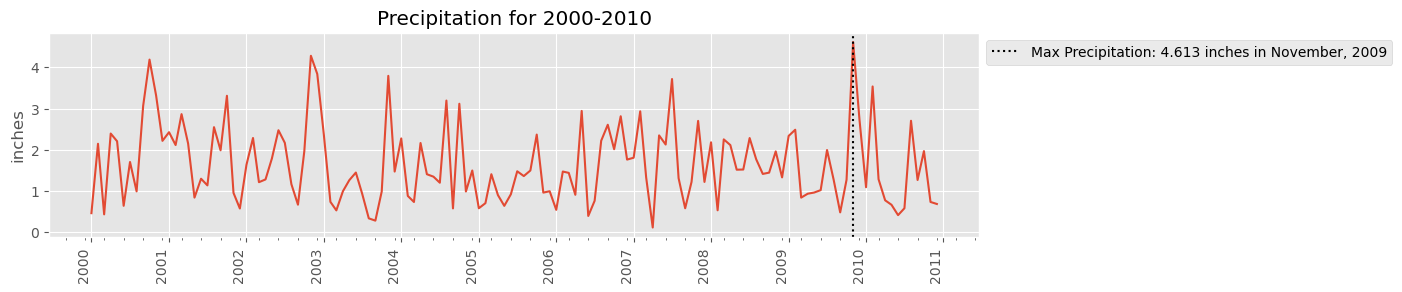

In [16]:
#plot data
fig, ax = plt.subplots(figsize=(12,3))

ax.plot(prec_MS)

ax.set(title = "Precipitation for 2000-2010", ylabel = 'inches')
#max precipitation
ax.axvline(prec_MS.idxmax(), color = 'black', ls = ':', 
           label = f"Max Precipitation: {prec_MS.max():.3f} inches in {prec_MS.idxmax().strftime('%B, %Y')}")
ax.legend(bbox_to_anchor=[1,1])
#customize major ticks
loc_year = mdates.YearLocator()
fmt_year = mdates.DateFormatter('%Y')

ax.xaxis.set_major_locator(loc_year)
ax.xaxis.set_major_formatter(fmt_year)

#Customize the minor xaxis ticks
loc_month = mdates.MonthLocator(interval=3)


ax.xaxis.set_minor_locator(loc_month)


fig.autofmt_xdate(which = 'major', rotation = 90)

## Q2: Which year between 2000-2020 had the coolest average temperature?

In [17]:
#make a copy of mean_temp
mean_temp = df.loc['2000':,'mean_temp'].copy()
mean_temp

date
2000-01-01    7.0
2000-01-02    7.9
2000-01-03    9.4
2000-01-04    7.0
2000-01-05    6.4
             ... 
2020-12-27    7.5
2020-12-28    1.1
2020-12-29    2.6
2020-12-30    2.7
2020-12-31   -0.8
Name: mean_temp, Length: 7671, dtype: float64

In [18]:
#Resample the data as Yearly frequency
mean_temp_Y= mean_temp.resample('A').mean()
mean_temp_Y.name = 'Resampled mean temperature'
mean_temp_Y.head()

date
2000-12-31    11.575683
2001-12-31    11.331507
2002-12-31    12.084247
2003-12-31    12.114521
2004-12-31    11.900683
Freq: A-DEC, Name: Resampled mean temperature, dtype: float64

In [19]:
# date and corresponding value for the max mean temp
print(f"The maximum mean temperature was {mean_temp_Y.max():.3f} degrees in {mean_temp_Y.idxmax().strftime('%Y')}")
#print(f"The maximum mean temperature was {mean_temp.max():.3f} degrees on {mean_temp.idxmax().strftime('%B %d,%Y')}")

The maximum mean temperature was 12.724 degrees in 2020


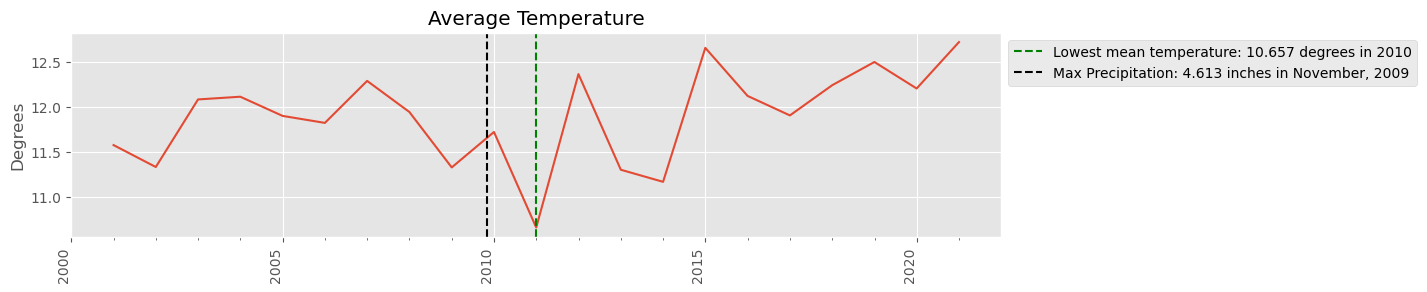

In [20]:
#plot data
fig, ax = plt.subplots(figsize=(12,3))
ax.plot(mean_temp_Y)
ax.set(title = "Average Temperature", ylabel = 'Degrees')

#customize major ticks
loc_year_maj = mdates.YearLocator(5)
fmt_year = mdates.DateFormatter('%Y')

ax.xaxis.set_major_locator(loc_year_maj)
ax.xaxis.set_major_formatter(fmt_year)

#Customize the minor xaxis ticks
loc_year_min = mdates.YearLocator(1)
ax.xaxis.set_minor_locator(loc_year_min)

#lowest temperature
ax.axvline(mean_temp_Y.idxmin(), color = 'green', ls = '--', 
           label = f"Lowest mean temperature: {mean_temp_Y.min():.3f} degrees in {mean_temp_Y.idxmin().strftime('%Y')}")
#max precipitation
ax.axvline(prec_MS.idxmax(), color = 'black', ls = '--', 
           label = f"Max Precipitation: {prec_MS.max():.3f} inches in {prec_MS.idxmax().strftime('%B, %Y')}")
ax.legend(bbox_to_anchor=[1,1])

# Add gridlines for major xaxis ticks
#ax.grid(which='major',axis='x',color='k',ls=':',lw=1)

fig.autofmt_xdate(which = 'major', rotation = 90)

In [21]:
# the date and value for the lowest mean temp
print(f"The lowest mean temperature was {mean_temp_Y.min():.3f} degrees in {mean_temp_Y.idxmin().strftime('%Y')}")

The lowest mean temperature was 10.657 degrees in 2010
